In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Course Material/Text Classification- Sentiment Analysis

/content/drive/MyDrive/Course Material/Text Classification- Sentiment Analysis


In [4]:
df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
df.shape

(10000, 2)

# Check for null values

In [6]:
df.isnull().sum()

,0
label,0
review,0


# Check if the data is balanced

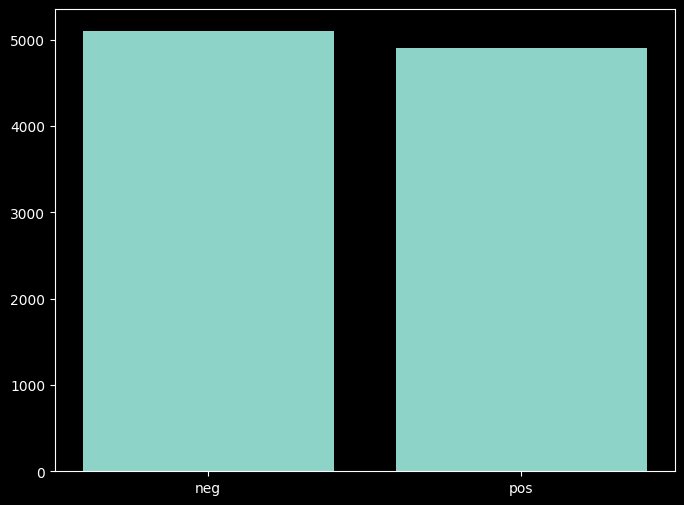

In [7]:
plt.figure(figsize = (8,6))
x, y = np.unique(df['label'], return_counts=True)
plt.bar(x, y, align='center')
plt.gca().set_xticks(x)
plt.show()

In [8]:
df['label'].value_counts()

,count
label,
neg,5097
pos,4903


# Converting Labels to Integers

In [9]:
df['label'] = df['label'].map({'pos' : 1, 'neg' : 0})
df.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


# Extracting Features and Labels

In [10]:
features = df['review']
labels = df['label']

# Performing Train test split

In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Map the text into numbers using Tfidf vectorizer:

In [12]:
featurizer = TfidfVectorizer(max_features=2000)
Xtrain = featurizer.fit_transform(train_data)
Xtest = featurizer.transform(test_data)

# Instantiate and train KNN Classifier

In [13]:
knn = KNeighborsClassifier()

knn.fit(Xtrain, train_labels)

KNeighborsClassifier()

# Get the predictions

In [14]:
y_pred = knn.predict(Xtest)

# Create Confusion Matrix

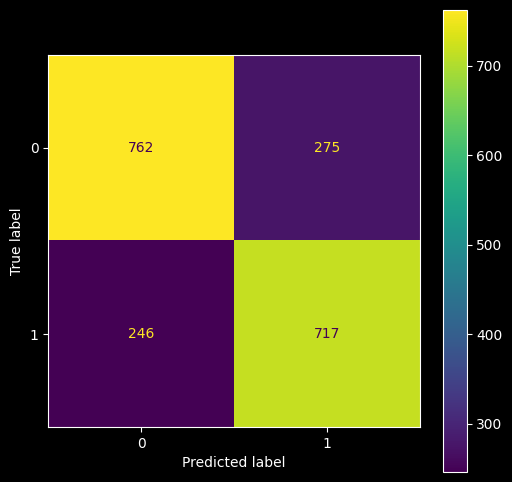

In [15]:
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
fig = disp.ax_.get_figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.show()

# Calculate Accuracy, Precision, Recall and F1-Score

In [16]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.74
Precision: 0.72
Recall: 0.74
F1 Score: 0.73


# Create Reviews to Check the Model

In [17]:
pos_review = 'This was a great purchase. I am very satisfied with the quality'
neg_review = 'HORRIBLE product. Do not buy it. Very cheap quality'

In [18]:
test = featurizer.transform([pos_review, neg_review])

In [19]:
knn.predict(test)

array([1, 0])